In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("C://Users//Documents//Downloads/bitcoin_dataset.csv")
data.head(2)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0


In [4]:
data.loc[1023,"btc_market_price"]

13.6888

In [5]:
data["btc_market_price"].corr(data["btc_total_bitcoins"])

0.3924739671678438

In [6]:
data[data.columns[1:]].corr()["btc_market_price"][:]

btc_market_price                                       1.000000
btc_total_bitcoins                                     0.392474
btc_market_cap                                         0.999783
btc_trade_volume                                       0.868813
btc_blocks_size                                        0.674507
btc_avg_block_size                                     0.544033
btc_n_orphaned_blocks                                 -0.076400
btc_n_transactions_per_block                           0.544125
btc_median_confirmation_time                           0.275250
btc_hash_rate                                          0.920876
btc_difficulty                                         0.916937
btc_miners_revenue                                     0.986732
btc_transaction_fees                                   0.806595
btc_cost_per_transaction_percent                      -0.013517
btc_cost_per_transaction                               0.815507
btc_n_unique_addresses                  

In [7]:
data.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [8]:
data.fillna(data.mean(),inplace=True)

In [9]:
X=data.drop(["Date","btc_market_price"], axis=1)
y=data["btc_market_price"]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn import metrics

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
import seaborn as seabornInstance

In [13]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
print(regressor.intercept_)
print(regressor.coef_)

-6.305443774878995
[-1.34612704e-06  5.83192297e-08 -3.36156260e-09 -2.05690706e-04
 -4.03018133e+01 -1.09816597e-02 -2.94145665e-02  1.09221766e+00
 -1.76705529e-05  2.95824609e-11 -2.77154518e-06 -7.75999052e-02
  1.66874882e-04  3.58934793e+00  1.41277498e-04  4.27738009e-04
  4.82143647e-07 -3.28656960e-04  1.10226221e-04 -4.76556268e-07
 -2.11819398e-06  3.38230772e-08]


In [15]:
y_pred = regressor.predict(X_test)

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 13.204743684942947
Mean Squared Error: 388.9577285694585
Root Mean Squared Error: 19.72201127089878


D:\Anacondafiles\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='btc_market_price', ylabel='Density'>

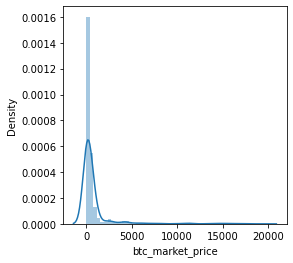

In [17]:
plt.figure(figsize=(4,4))
plt.tight_layout()
seabornInstance.distplot(data["btc_market_price"])